# <span style="color:brown">Geolocalisation -  Notebook 2.1 Modelling continuous data - SUBSPECIES</span>

## <span style="color:brown">0. Load packages and data stored as pkl</span>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score

# If should be df_c2_filtPos80filtSamp70 but for abbreviation we will made it df_train_c
df = pd.read_pickle("./pkl/df_c2_filtPos80filtSamp70.pkl.gz", compression="infer") # Import object with pickle

geo = pd.read_csv("../../../Documents/Postgrau_DSML/Geolocalisation/data/Sample_localisation_extended.csv") # Data with geolocalisation

In [8]:
df.shape

(346, 288274)

## <span style="color:brown">1. Formatting the data</span>
### <span style="color:brown">1.1 Obtain distribution of mean values</span>

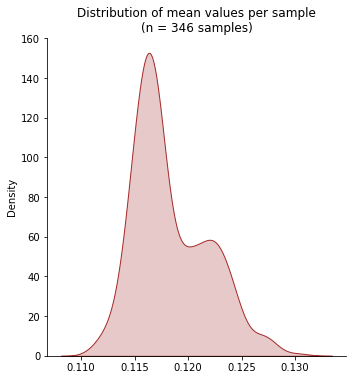

In [5]:
sns.displot(df.mean(axis=1), color="brown", kind="kde", fill = True).set(title = "Distribution of mean values per sample\n(n = 346 samples)")


### <span style="color:brown">1.2 Replace NaN by mean of columns and rows</span>

In [6]:
mean_val=df.iloc[:,].mean().mean()
df = df.replace(np.nan, mean_val)
#df.to_csv('./pkl/df_filtPos80filtSamp70_meanval.csv', index = True)

## <span style="color:brown">2. Modelling </span>
#### <span style="color:brown">Define X and y variables</span>

In [20]:
# Set seed
import random
random.seed(1)

In [21]:
names = df.axes[0].tolist() # Names of samples
geo = geo.reset_index().set_index('ExtractID').loc[names].reset_index().set_index('index') # Extract geo rows that are in names

y = geo.iloc[:,5:6] # For subspecies
X = df.reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# To make sure that dimensions are ok
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(276, 288274)
(70, 288274)
276
70


### <span style="color:brown">2.1 Random forest</span>

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train + predict
rf_clf = RandomForestClassifier()
rf_y_pred = rf_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The rf_clf model has an accuracy of", rf_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", accuracy_score(y_test, rf_y_pred)) 

The rf_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0


<span style="color:brown">The Random Forest classifier shows an accuracy of 1 for the classification at the subspecies level.</span>

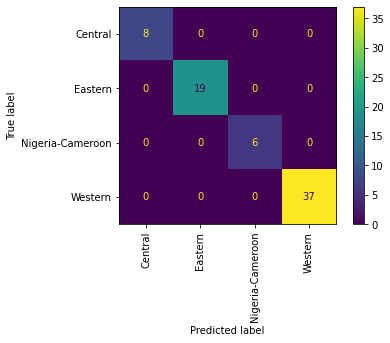

In [69]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_y_pred, labels=rf_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

disp.plot(xticks_rotation = 'vertical')

### <span style="color:brown">2.2 Nearest Neighbors</span>

In [41]:
from sklearn import neighbors

# Train + predict
nn_clf = KNeighborsClassifier(n_neighbors = 4)
nn_y_pred = nn_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The nn_clf model has an accuracy of", nn_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", accuracy_score(y_test, nn_y_pred)) 

The nn_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0


<span style="color:brown">Nearest Neighbors also show high performance.</span>

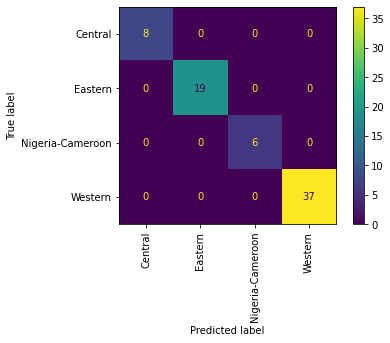

In [70]:
cm = confusion_matrix(y_test, nn_y_pred, labels=nn_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_clf.classes_)

disp.plot(xticks_rotation = 'vertical')

### <span style="color:brown">2.3 Support vector machine</span>

In [44]:
from sklearn.svm import LinearSVC

# Train + predict
svm_clf = KNeighborsClassifier(n_neighbors = 4)
svm_y_pred = svm_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The svm_clf model has an accuracy of", svm_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", accuracy_score(y_test, svm_y_pred)) 

The svm_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0


<span style="color:brown">Support vector machine also shows an accuracy of 1.</span>

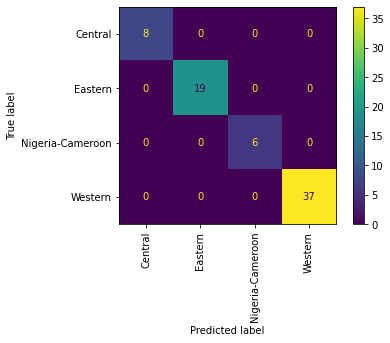

In [71]:
cm = confusion_matrix(y_test, svm_y_pred, labels=svm_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)

disp.plot(xticks_rotation = 'vertical')

### <span style="color:brown">2.4 Categorical Naive Bayes</span>

In [92]:
from sklearn.naive_bayes import CategoricalNB

# Train + predict
cnb_clf = CategoricalNB(min_categories=4)
cnb_y_pred = cnb_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The cnb_clf model has an accuracy of", cnb_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", accuracy_score(y_test, cnb_y_pred)) 

The cnb_clf model has an accuracy of 0.822463768115942 in the data it has been trained.
Balanced accuracy: 0.8


<span style="color:brown">Naive Bayes shows lower performance.</span>

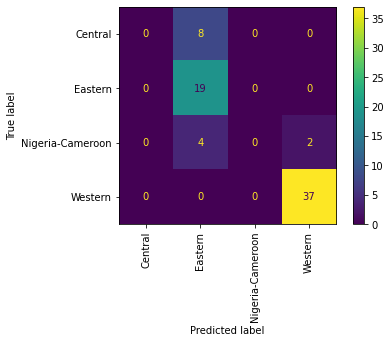

In [90]:
cm = confusion_matrix(y_test, cnb_y_pred, labels=cnb_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cnb_clf.classes_)

disp.plot(xticks_rotation = 'vertical')

## <span style="color:brown">3. Conclusion </span>
<span style="color:brown">Once clean data is available, it is possible use a variety of classifiers for predicting the chimpanzee's subspecies from DNA. Out of the four classifiers tested, random forest, nearest neighbors and support vector machine are the ones which perform best, as all of them yield an accuracy of 1. </span>